In [33]:
import numpy as np
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from matplotlib import cm

## I. Data Simulation 

In [2]:
# simulate population
pop1_X, pop1_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=0) 
pop2_X, pop2_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=100) 
pop3_X, pop3_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=-100) 

In [22]:
# combine as matrix 
pop_X = np.concatenate((pop1_X,pop2_X,pop3_X))
pop_Y = np.concatenate((pop1_Y, 2 * pop2_Y, -2 * pop3_Y))

In [23]:
# Add intercept to covariates 
pop_X = np.append(np.vstack(np.ones(len(pop_X))),pop_X,1)
pop_X.shape

(300, 2)

In [25]:
pop_Y = np.vstack(pop_Y)

In [37]:
### plot
mycmap = cm.brg 
fig = plt.figure(figsize(6,6), dpi=1600) 
plt.subplots_adjust(hspace=.5)  
gridsize = (1,1)
ax0 = plt.subplot2grid(gridsize,(0,0))
sc = ax0.scatter(pop_X[:,1], pop_Y, s=100, alpha=.4, c=range(len(pop_X)), cmap=mycmap) 
plt.colorbar(sc, ax=ax0)

### Three linear relationships are shown in the plot. Goal: Make sure the incoming batch automatically adapt to the right model. 

## II. Gradient Descent with finite data

In [75]:
def fx(theta, X):
    # X has intercept 1's 
    # X.theta = alpha + beta * x
    return np.dot(X, theta)

def fcost(theta,X,y):
    return 1./2*(len(X)) * sum(np.vstack(fx(theta,X))-y)**2



In [76]:
a_possible = np.asarray(range(-40,60,1))
b_possible = np.asarray(range(0,140,1))

In [47]:
# return coordinate 
X, Y = np.meshgrid(a_possible, b_possible)

In [82]:
# cost at each coordinate (a,b)
z = dstack([X.flatten(),Y.flatten()])[0]
j = np.array([(fcost(z[i], pop_X[0:100], pop_Y[0:100])) for i in range(len(z))])
J = j.reshape(shape(X))

Text(0, 0.5, '$\\beta$')

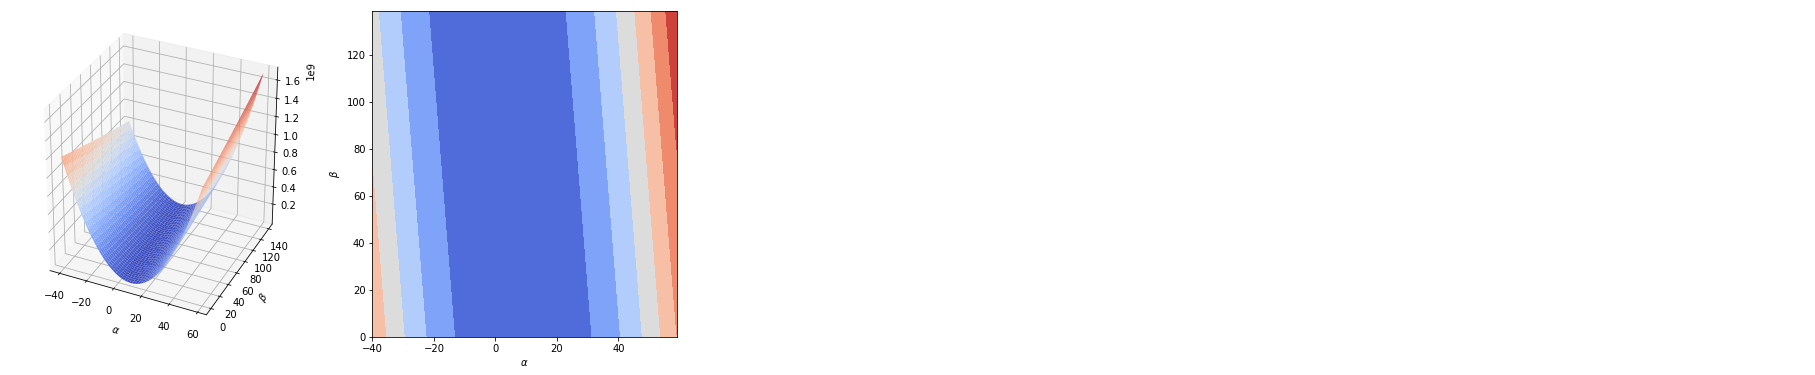

In [89]:
## plot
fig = plt.figure(figsize(12,6))
plt.subplots_adjust(hspace=.5)   
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, J, cmap=cm.coolwarm)
ax.view_init(azim=295, elev=30)
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax = fig.add_subplot(122)
ax.contourf(X, Y, J, cmap=cm.coolwarm)
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')

 The gradient of gradient descent is the gradient of the cost function, which we find by taking the partial derivative of the cost function with respect to the model coefficients. Steps: 1. For the current value of α and β, calculate the cost and the gradient of the cost function at that point 2. Update the values of $\alpha$ and $\beta$ by taking a small step towards the minima. This means, subtracting some fraction of the gradient from them. The formulae are: α= α − γ$\frac{∂J(α,β)}{∂α}$ = α−γ$\frac{1}{n}$∑ 2(α+βx−y) 
β = β− γ$\frac{∂J(α,β)}{∂β}$ = β−γ$\frac{1}{n}$∑2x(α+βx−y)

In [90]:
# parameters
n_learning_rate = 0.25     
# Specify starting values for alpha and beta
theta = [0,0]

In [91]:
# calculate gradient at a given theta
def gradient(theta, X, y):
    grad_theta = (1./len(X)) * sum(np.multiply(np.vstack(fx(theta, X)) - y, X),axis=0) 
    return grad_theta

In [92]:
arraytheta = np.array(theta)
arraycost = np.array(fcost(theta, pop_X[0:100], pop_Y[0:100]))

In [93]:
# for 5 iters
for i in range(5):
    theta = theta - n_learning_rate * gradient(theta, pop_X[0:100], pop_Y[0:100])
    arraytheta = np.vstack([arraytheta, theta])

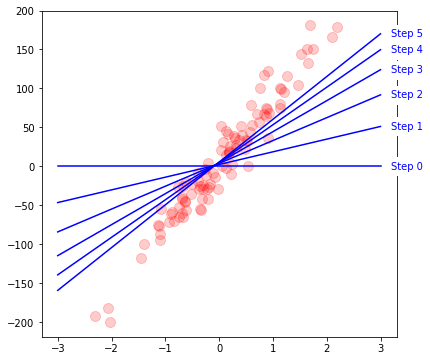

In [95]:
### Plot
fig = plt.figure(figsize(14,6))
plt.subplots_adjust(hspace=.5)            
gridsize = (1,2)
ax0 = plt.subplot2grid(gridsize,(0,0))
ax0.scatter(pop_X[0:100,1], pop_Y[0:100], s=100, alpha=.2, c='red')


xrangex = np.linspace(-3,3,50)
for i in range(0, len(arraytheta)):
    yrangey = arraytheta[i,0] + arraytheta[i,1] * xrangex
    ax0.plot(xrangex, yrangey, c='blue') 
    ax0.text(3.5, arraytheta[i,0] + arraytheta[i,1] * 3, "Step " + str(i), color='blue', 
             ha="center", va="center", bbox = dict(ec='1',fc='1'))
 

## III. SGD with streaming data 

In [97]:
## parameters
n_learning_rate = 0.1 
# same prediction and cost function as before 
## Specify prediction function
def fx(theta, X):
    return np.dot(X, theta)
 
## specify cost function
def fcost(theta, X, y):
    return (1./2*len(X)) * sum((fx(theta,X) - y)**2) 

In [98]:
## specify function to calculate gradient at a given theta - returns a vector of length(theta)
# different from gradient descent method 
# not summing up the gradients 
def gradient(theta, X, y):
    grad_theta = (1./len(X)) * np.multiply((fx(theta, X)) - y, X) 
    return grad_theta

In [126]:
### DO stochastic gradient descent
# starting values for alpha & beta
theta = [0,0]


In [127]:
# store starting theta & cost
arraytheta = np.array([theta])
arraycost = np.array([])
 

In [128]:
# feed data through and update theta; capture cost and theta history
for i in range(0, len(pop_X)):
    
    # calculate cost for theta on CURRENT point
    cost = fcost(theta, pop_X[i], pop_Y[i])
    arraycost = np.append(arraycost, cost)
    
    # update theta with gradient descent
    theta = theta - n_learning_rate * gradient(theta, pop_X[i], pop_Y[i])
    arraytheta = np.vstack([arraytheta, theta])
 

#### Recall: in gradient descent with finite data, precompute all the costs in feed into arraycost since we are given all the data at once. In SGD, compute cost at each incoming set of (X,Y) and compute gradient at each data point. 

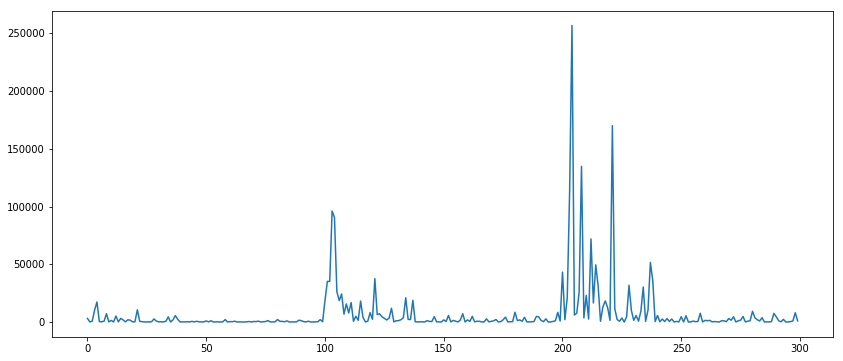

In [131]:
# plot the prediction error 
plt.plot(arraycost)

### Error spikes at 100 and 200, indicating the new incoming batch, at which point the model adpating the new batch. 